In [2]:
from google.colab import files
uploaded = files.upload()

Saving Malaria.csv to Malaria.csv


Best fitting Dist for the Malaria data: Poisson Binomial
{'Binomial': 73576.92699272199, 'Bernoulli': 10728848.530610632, 'Discrete Uniform': 77177.31666666667, 'Poisson Binomial': 72491.64698606705}


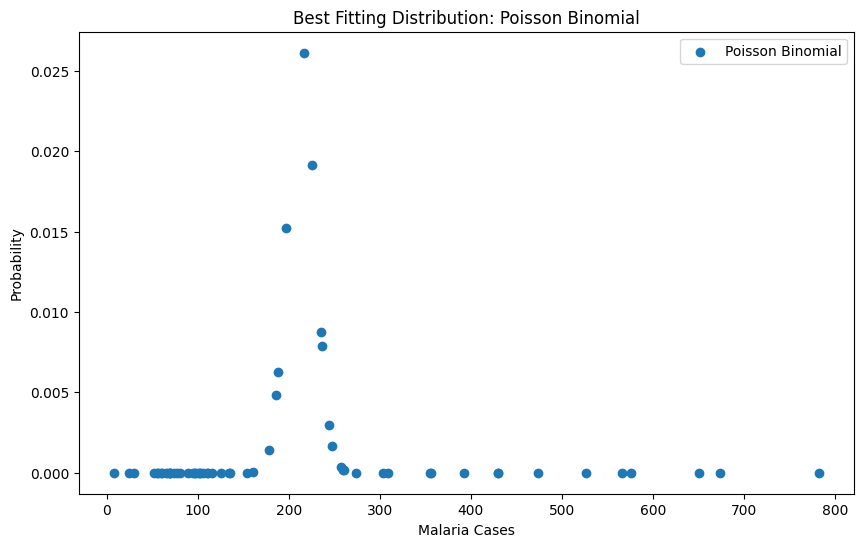

The best fitting distribution is: Poisson Binomial with MSE value: 72491.64698606705


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli, poisson
from sklearn.metrics import mean_squared_error

# Load the data
file_path = 'Malaria.csv'
malaria_data = pd.read_csv(file_path)
malaria_data.head()

years = ['2016', '2017', '2018', '2019', '2020']
malaria_cases = malaria_data[years].values.flatten()

# Binomial Distribution
n = malaria_cases.max()
p = malaria_cases.mean() / malaria_cases.max()
binom_dist = binom.pmf(malaria_cases, n, p)

# Bernoulli Distribution
bernoulli_cases = np.where(malaria_cases > 0, 1, 0)
bernoulli_dist = bernoulli.pmf(bernoulli_cases, p)

# Discrete Uniform Distribution
a = malaria_cases.min()
b = malaria_cases.max()
uniform_dist = np.full_like(malaria_cases, 1 / (b - a + 1))

# Poisson Distribution
mu = np.mean(malaria_cases)
poisson_binom_dist = poisson.pmf(malaria_cases, mu)

# MSE Calculation
mse_binom = mean_squared_error(malaria_cases, binom_dist * sum(malaria_cases))
mse_bernoulli = mean_squared_error(malaria_cases, bernoulli_dist * sum(malaria_cases))
mse_uniform = mean_squared_error(malaria_cases, uniform_dist * sum(malaria_cases))
mse_poisson_binom = mean_squared_error(malaria_cases, poisson_binom_dist * sum(malaria_cases))

mse_values = {
    'Binomial': mse_binom,
    'Bernoulli': mse_bernoulli,
    'Discrete Uniform': mse_uniform,
    'Poisson Binomial': mse_poisson_binom
}

best_fit = min(mse_values, key=mse_values.get)
print(f'Best fitting Dist for the Malaria data: {best_fit}')
print(mse_values)

#Plot
plt.figure(figsize=(10, 6))

if best_fit == 'Binomial':
    plt.scatter(malaria_cases, binom_dist, label='Binomial')
elif best_fit == 'Bernoulli':
    plt.bar([0, 1], [np.mean(bernoulli_cases == 0), np.mean(bernoulli_cases == 1)], label='Bernoulli')
elif best_fit == 'Discrete Uniform':
    plt.scatter(malaria_cases, uniform_dist, label='Discrete Uniform')
elif best_fit == 'Poisson Binomial':
    plt.scatter(malaria_cases, poisson_binom_dist, label='Poisson Binomial')

plt.xlabel('Malaria Cases')
plt.ylabel('Probability')
plt.legend()
plt.title(f'Best Fitting Distribution: {best_fit}')
plt.show()

print(f"The best fitting distribution is: {best_fit} with MSE value: {mse_values[best_fit]}")


Text(0.5, 1.0, 'Distribution of Malaria Cases')

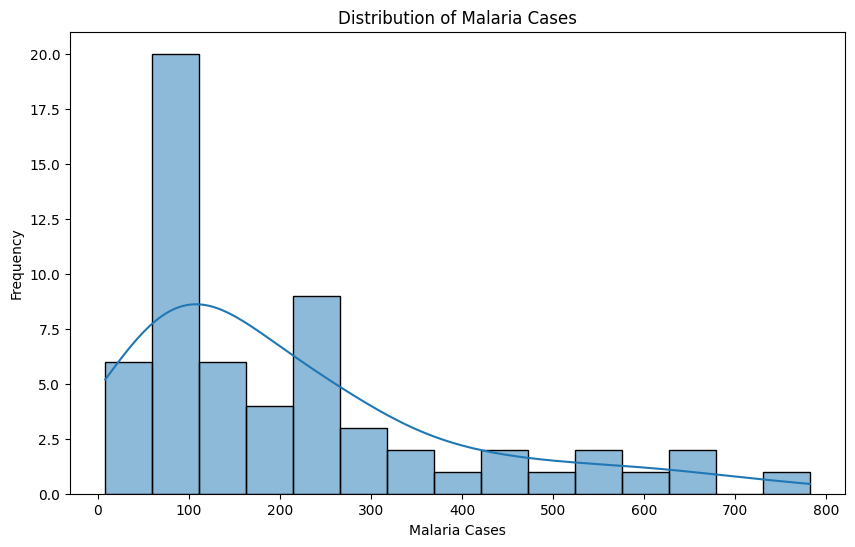

In [4]:
#Reference to the actual data
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(malaria_cases, bins=15, kde=True)
plt.xlabel('Malaria Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Malaria Cases')